## **Fetching Dataset**


In [2]:
# !pip install yfinance

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,SimpleRNN,Dense

## **Let's Use APPLE STOCK DATSET.**

In [13]:
df=yf.download('AAPL',start='2020-01-01',end='2024-07-05')

[*********************100%%**********************]  1 of 1 completed


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484322,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200
2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800


## **Scaling Data**

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df['Close'].values.reshape(-1,1))
print(scaled_data)


[[0.11480291]
 [0.11039088]
 [0.11397185]
 ...
 [0.97098951]
 [0.99226388]
 [1.        ]]


In [25]:
## Create Sequences
def create_sequences(data,sequence_length):
  xs = []
  ys = []
  for i in range(len(data)-sequence_length):
    xs.append(data[i:(i+sequence_length)])
    ys.append(data[i+sequence_length])
  return np.array(xs),np.array(ys) # De-indent return to outside the loop

sequence_length=60
X,y=create_sequences(scaled_data,sequence_length)


In [26]:
split=int(len(X)*0.8)
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

In [27]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))

## **Simple RNN**

In [30]:
model_RNN=Sequential()
model_RNN.add(SimpleRNN(units=50,activation='relu',input_shape=(sequence_length,1)))
model_RNN.add(Dense(1))
model_RNN.compile(optimizer='adam',loss='mean_squared_error')
model_RNN.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2) # Use validation_split for a 20% spli

Epoch 1/30
22/22 [==============================] - 3s 50ms/step - loss: 0.1258 - val_loss: 0.0152
Epoch 2/30
22/22 [==============================] - 1s 39ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 3/30
22/22 [==============================] - 1s 39ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/30
22/22 [==============================] - 1s 37ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/30
22/22 [==============================] - 1s 38ms/step - loss: 9.9066e-04 - val_loss: 0.0012
Epoch 6/30
22/22 [==============================] - 1s 37ms/step - loss: 8.3535e-04 - val_loss: 9.8627e-04
Epoch 7/30
22/22 [==============================] - 1s 38ms/step - loss: 7.9266e-04 - val_loss: 7.3218e-04
Epoch 8/30
22/22 [==============================] - 1s 39ms/step - loss: 7.0518e-04 - val_loss: 6.1477e-04
Epoch 9/30
22/22 [==============================] - 1s 38ms/step - loss: 6.6437e-04 - val_loss: 5.8524e-04
Epoch 10/30
22/22 [==============================] - 1s 40ms/step - loss:

## **LSTM**

In [33]:
model_LSTM=Sequential()
model_LSTM.add(LSTM(units=50,activation='relu',input_shape=(sequence_length,1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam',loss='mean_squared_error')
model_LSTM.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2)

Epoch 1/30
22/22 [==============================] - 3s 76ms/step - loss: 0.1743 - val_loss: 0.1322
Epoch 2/30
22/22 [==============================] - 1s 67ms/step - loss: 0.0167 - val_loss: 0.0100
Epoch 3/30
22/22 [==============================] - 2s 71ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/30
22/22 [==============================] - 2s 108ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/30
22/22 [==============================] - 2s 84ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/30
22/22 [==============================] - 2s 69ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/30
22/22 [==============================] - 1s 67ms/step - loss: 9.9456e-04 - val_loss: 0.0010
Epoch 8/30
22/22 [==============================] - 2s 70ms/step - loss: 9.4409e-04 - val_loss: 9.1601e-04
Epoch 9/30
22/22 [==============================] - 1s 67ms/step - loss: 9.0557e-04 - val_loss: 7.7557e-04
Epoch 10/30
22/22 [==============================] - 2s 74ms/step - loss: 8.6425e-04 - v

## **PREDICTION AND EVALUATION**

In [34]:
prediction_RNN=model_RNN.predict(X_test)
prediction_LSTM=model_LSTM.predict(X_test)

7/7 [==============================] - 0s 16ms/step


In [35]:
prediction_RNN=scaler.inverse_transform(prediction_RNN)
prediction_LSTM=scaler.inverse_transform(prediction_LSTM)
y_test_actual=scaler.inverse_transform(y_test.reshape(-1,1))

In [37]:
MSE_RNN=mean_squared_error(y_test_actual,prediction_RNN)
MSE_LSTM=mean_squared_error(y_test_actual,prediction_LSTM)
print(MSE_RNN)
print(MSE_LSTM)

18.51846180630543
30.282579514343084


In [38]:
MSE_R2=r2_score(y_test_actual,prediction_RNN)
MSE_L2=r2_score(y_test_actual,prediction_LSTM)
print(MSE_R2)
print(MSE_L2)

0.8688308747775939
0.7855038120378958


In [42]:
last_sequence=scaled_data[-sequence_length:]
last_sequence=last_sequence.reshape((1,sequence_length,1))

next_day_RNN=model_RNN.predict(last_sequence)
next_day_LSTM=model_LSTM.predict(last_sequence)

next_day_RNN=scaler.inverse_transform(next_day_RNN)
next_day_LSTM=scaler.inverse_transform(next_day_LSTM)

print(f'Next day prediction using RNN: {next_day_RNN[0][0]}')
print(f'Next day prediction using LSTM: {next_day_LSTM[0][0]}')

1/1 [==============================] - 0s 28ms/step
Next day prediction using RNN: 218.99537658691406
Next day prediction using LSTM: 211.781494140625


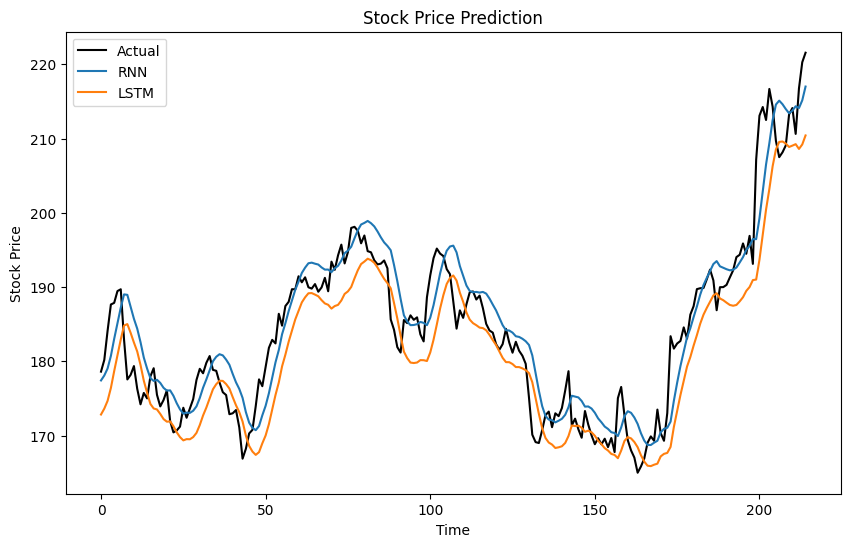

In [47]:
plt.figure(figsize=(10,6))
plt.plot(y_test_actual,label='Actual',color='black')
plt.plot(prediction_RNN,label='RNN')
plt.plot(prediction_LSTM,label='LSTM')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()